In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)


In [3]:
# Add the latititudes and longitutes to a list. 
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

625

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3646aa49cb040508920edeba01c12a2


In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval:1-50")
print("Second Data Retrieval:51-100")
print("Third Data Retrieval:101-150")
print("Fourth Data Retrieval:151-200")
print("Fifth Data String:201-250")
print("Sixth Data Retrieval:251-300")
print("Seventh Data Retrieval:301-350")
print("Eigth Data Retrieval:351-400")
print("Ninth Data Retrieval:401-450")
print("Tenth Data Retrieval:451-500")
print("Eleventh Data Retrieval:501-550")
print("Twelfth Data Retrieval:551-600")
print("Thirteenth Data Retrieval:601-649")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval:1-50
Second Data Retrieval:51-100
Third Data Retrieval:101-150
Fourth Data Retrieval:151-200
Fifth Data String:201-250
Sixth Data Retrieval:251-300
Seventh Data Retrieval:301-350
Eigth Data Retrieval:351-400
Ninth Data Retrieval:401-450
Tenth Data Retrieval:451-500
Eleventh Data Retrieval:501-550
Twelfth Data Retrieval:551-600
Thirteenth Data Retrieval:601-649


In [7]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | nikolskoye
Processing Record 2 of Set 1 | castro
Processing Record 3 of Set 1 | lata
Processing Record 4 of Set 1 | skalistyy
City not found. Skipping...
Processing Record 5 of Set 1 | sinnamary
Processing Record 6 of Set 1 | manoel urbano
Processing Record 7 of Set 1 | qujing
Processing Record 8 of Set 1 | busselton
Processing Record 9 of Set 1 | port elizabeth
Processing Record 10 of Set 1 | clyde river
Processing Record 11 of Set 1 | camacha
Processing Record 12 of Set 1 | bethel
Processing Record 13 of Set 1 | talnakh
Processing Record 14 of Set 1 | kampene
Processing Record 15 of Set 1 | pemangkat
Processing Record 16 of Set 1 | khatanga
Processing Record 17 of Set 1 | vila franca do campo
Processing Record 18 of Set 1 | zemio
Processing Record 19 of Set 1 | atuona
Processing Record 20 of Set 1 | ovsyanka
Processing Record 21 of Set 1 | lebu
Processing Record 22 of Set 1 | mataura
Processing Record 23 of Set 1 | bredasdorp
Processing Record 24 of Set

In [8]:
len(city_data)

576

In [9]:
# Convert the array of dictionaries to a Pandas dataframe. 
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Nikolskoye,59.7035,30.7861,39.09,91,95,9.98,RU,2022-04-15 20:00:21
1,Castro,-24.7911,-50.0119,61.77,58,0,5.77,BR,2022-04-15 19:59:33
2,Lata,40.1629,-8.3327,59.81,83,100,2.51,PT,2022-04-15 20:00:21
3,Sinnamary,5.3833,-52.9500,80.69,77,100,11.30,GF,2022-04-15 20:00:22
4,Manoel Urbano,-8.8389,-69.2597,78.96,92,100,2.86,BR,2022-04-15 20:00:22
5,Qujing,25.4833,103.7833,56.25,86,0,4.70,CN,2022-04-15 20:00:23
6,Busselton,-33.6500,115.3333,58.12,92,11,6.69,AU,2022-04-15 20:00:23
7,Port Elizabeth,-33.9180,25.5701,59.31,71,82,1.99,ZA,2022-04-15 20:00:23
8,Clyde River,70.4692,-68.5914,-5.94,90,18,9.33,CA,2022-04-15 20:00:24
9,Camacha,33.0833,-16.3333,58.42,82,20,12.66,PT,2022-04-15 20:00:24


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
cit_data_df = city_data_df[new_column_order]
cit_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Nikolskoye,RU,2022-04-15 20:00:21,59.7035,30.7861,39.09,91,95,9.98
1,Castro,BR,2022-04-15 19:59:33,-24.7911,-50.0119,61.77,58,0,5.77
2,Lata,PT,2022-04-15 20:00:21,40.1629,-8.3327,59.81,83,100,2.51
3,Sinnamary,GF,2022-04-15 20:00:22,5.3833,-52.9500,80.69,77,100,11.30
4,Manoel Urbano,BR,2022-04-15 20:00:22,-8.8389,-69.2597,78.96,92,100,2.86
5,Qujing,CN,2022-04-15 20:00:23,25.4833,103.7833,56.25,86,0,4.70
6,Busselton,AU,2022-04-15 20:00:23,-33.6500,115.3333,58.12,92,11,6.69
7,Port Elizabeth,ZA,2022-04-15 20:00:23,-33.9180,25.5701,59.31,71,82,1.99
8,Clyde River,CA,2022-04-15 20:00:24,70.4692,-68.5914,-5.94,90,18,9.33
9,Camacha,PT,2022-04-15 20:00:24,33.0833,-16.3333,58.42,82,20,12.66


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [15]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'04/15/22'

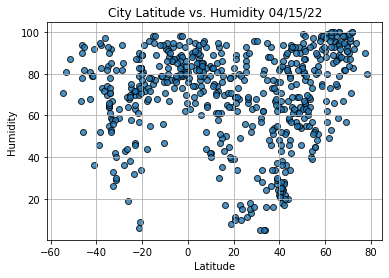

In [20]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

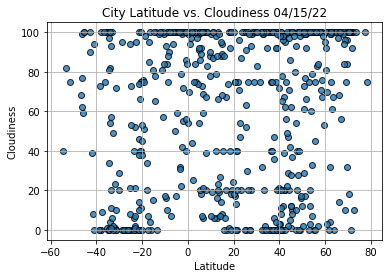

In [21]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

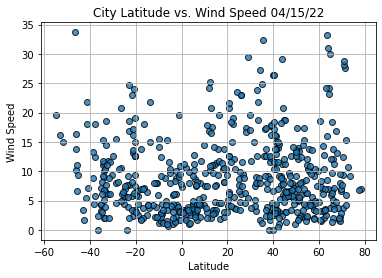

In [22]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()